# Indicators

In this notebook we collect important economic indicators.

## Preparation

In [1]:
from usefulFunctions import BLS

Functions uploaded: readJSONfile, inflation, BLS


In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Retreiving the BLS API key
%run "APIkeys.py"
BLSkey = os.environ['BLS_API_key']

API keys loaded now


In [4]:
# You can check the Python version you have installed on your computer. Uncomment the following two lines and run this cell.

# import sys
# print(sys.version)

BLS data can be found [here](https://www.bls.gov/help/hlpforma.htm).

# Price Indices

## CPI-U

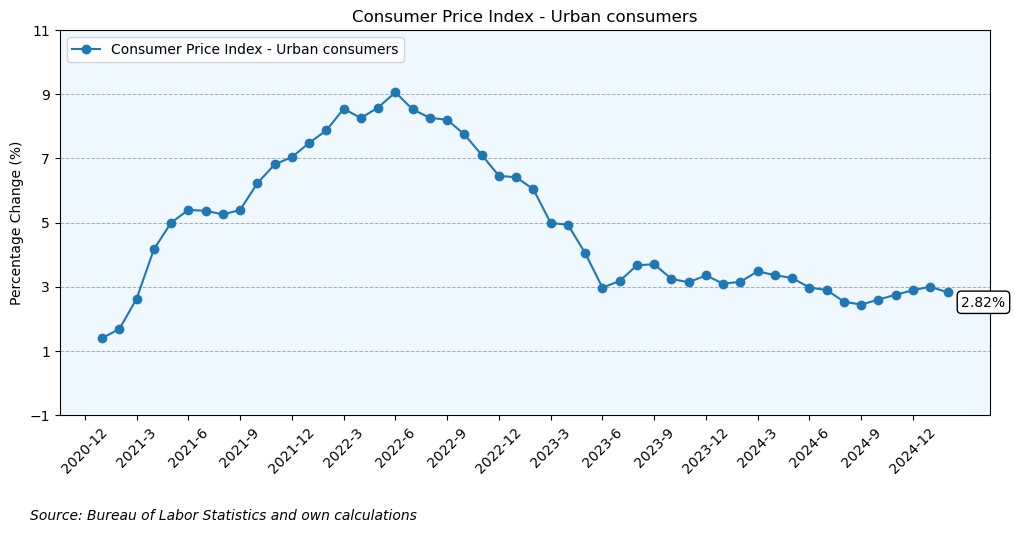

In [5]:
BLS(BLSkey,display=True)

## Producer Price Index (PPI)

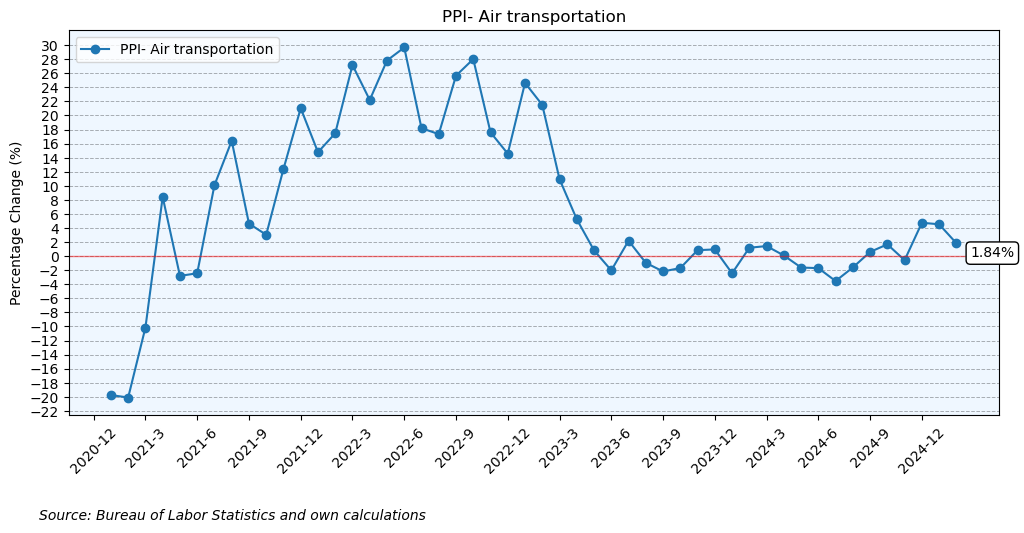

In [6]:
BLS(BLSkey,display=True,seriesDict={"PCU481---481---": "PPI- Air transportation"})

Note: More industry NACIS codes can be found [here](https://download.bls.gov/pub/time.series/pc/pc.industry).

## Unemployment

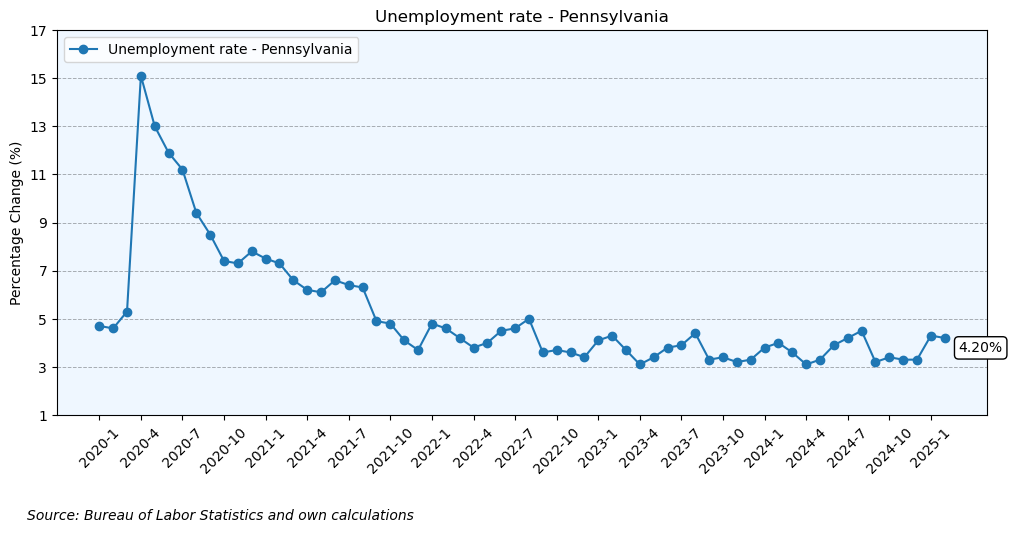

In [7]:
BLS(BLSkey,display=True,seriesDict={"LAUST420000000000003": "Unemployment rate - Pennsylvania"},first="2020",change=False)

# Energy data

In this section we use data from the [US Energy Administration](https://www.eia.gov/).

To get an API key, go [here](https://www.eia.gov/opendata/documentation.php). Add the key you get by e-mail to APIkeys.py using 

```Python
os.environ["EIA_API_key"] = "<paste the key here>"
```

In [8]:
EIAkey=os.environ['EIA_API_key']

### Energy use

In [9]:
EIAurl = 'https://api.eia.gov/v2/seriesid/ELEC.SALES.US-RES.A?api_key='+EIAkey+'&frequency=monthly'

In [10]:
#EIAurl

In [11]:
r=requests.get(EIAurl).json()

In [12]:
EIA_df_KWh = pd.DataFrame(r['response']['data'])

In [13]:
#EIA_df_KWh.head()

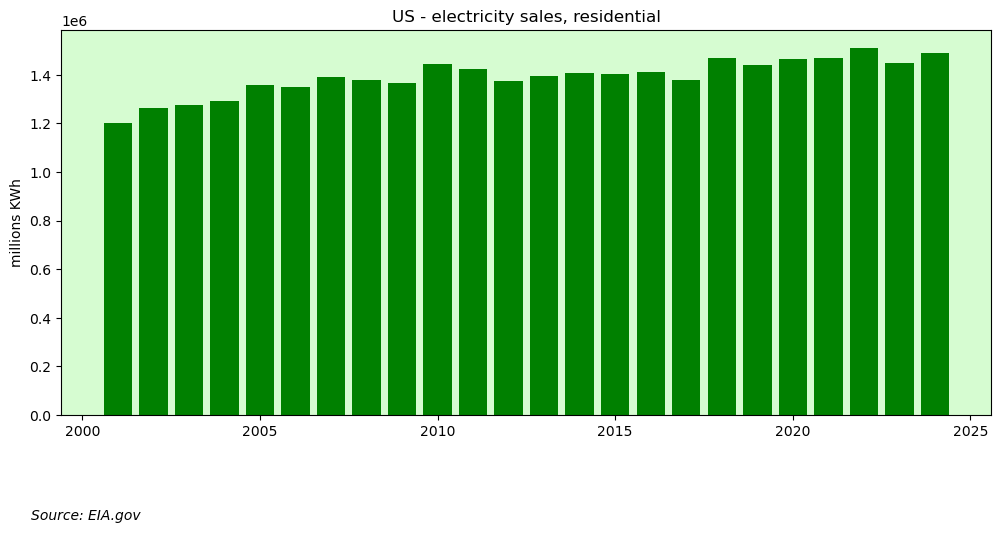

In [14]:
plt.figure(figsize=(12, 5))
plt.bar(EIA_df_KWh['period'],EIA_df_KWh['sales'],color="green")
plt.gca().set_facecolor((0.2, 0.95, 0.1, 0.2))
plt.ylabel("millions KWh")
plt.title("US - electricity sales, residential")
plt.figtext(0.1, -0.1, "Source: EIA.gov", ha='left', fontsize=10, style='italic')
plt.show()

### Prices

In [15]:
EIAurl2 ='https://api.eia.gov/v2/electricity/retail-sales/data?api_key='+EIAkey+'&data[]=price&facets[sectorid][]=RES&facets[stateid][]=PA&frequency=monthly&start=2020-01-31'
#note: look at the documentation

In [16]:
r=requests.get(EIAurl2).json()

In [17]:
EIA_df_price = pd.DataFrame(r['response']['data'])

In [18]:
# Sorting a DataFrame

EIA_df_price.sort_values(by='period', ascending=True, inplace=True)

In [19]:
#EIA_df_price.head()

In [20]:
#EIA_df_price.tail()

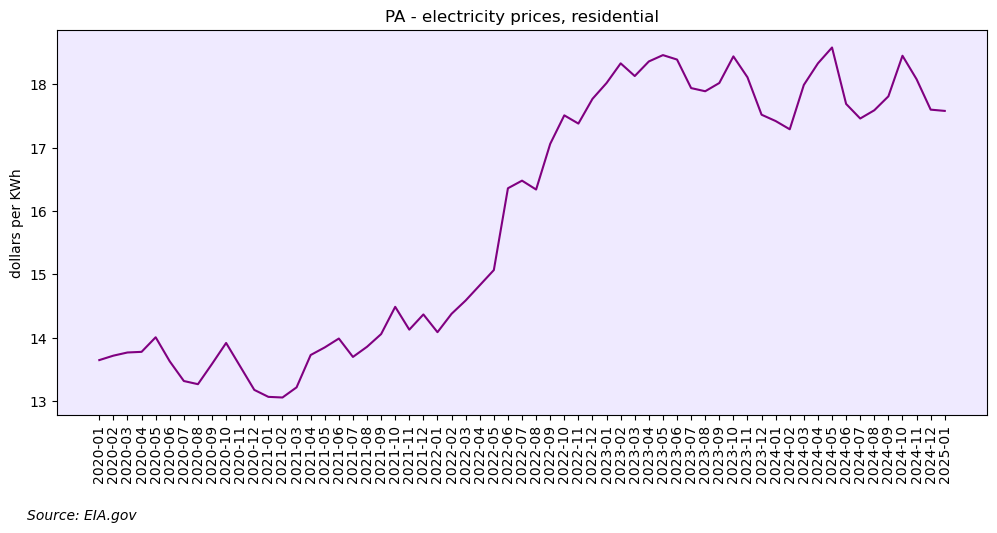

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(EIA_df_price['period'],EIA_df_price['price'].astype(float),color="purple")
plt.gca().set_facecolor((0.7, 0.6, 1, 0.2))
plt.ylabel("dollars per KWh")
plt.title("PA - electricity prices, residential")
plt.xticks(rotation=90)
plt.figtext(0.1, -0.1, "Source: EIA.gov", ha='left', fontsize=10, style='italic')
plt.show()

In [22]:
def EIA(EIAkey:str,*,
        state:str ="US",
        series:str="price",
        plot:bool = True) -> pd.DataFrame | None :
    if series.lower()=="sales":
        EIAurl = 'https://api.eia.gov/v2/seriesid/ELEC.SALES.'+state+'-RES.A?api_key='+EIAkey+'&frequency=monthly'
    else:
        EIAurl ='https://api.eia.gov/v2/electricity/retail-sales/data?api_key='+EIAkey+'&data[]=price&facets[sectorid][]=RES&facets[stateid][]='+state+'&frequency=monthly&start=2020-01-31'
    
    r=requests.get(EIAurl).json()
    EIA_df = pd.DataFrame(r['response']['data'])
    EIA_df.sort_values(by='period', ascending=True, inplace=True)

    if plot==True:
        plt.figure(figsize=(12, 5))
        if series.lower=='sales':
            plt.bar(EIA_df_KWh['period'],EIA_df_KWh['sales'],color="green")
            plt.ylabel("millions KWh")
            plt.gca().set_facecolor((0.2, 0.95, 0.1, 0.2))
            plt.title(state+" - electricity millions KWh, residential")
 
        else:
            plt.plot(EIA_df['period'],EIA_df['price'].astype(float),color="purple")
            plt.ylabel("dollars per KWh")
            plt.gca().set_facecolor((0.7, 0.6, 1, 0.2))
            plt.title(state+" - electricity prices, residential")
        
        plt.xticks(rotation=90)
        plt.figtext(0.1, -0.1, "Source: EIA.gov", ha='left', fontsize=10, style='italic')
        plt.show()
        return None
    else:
        return EIA_df

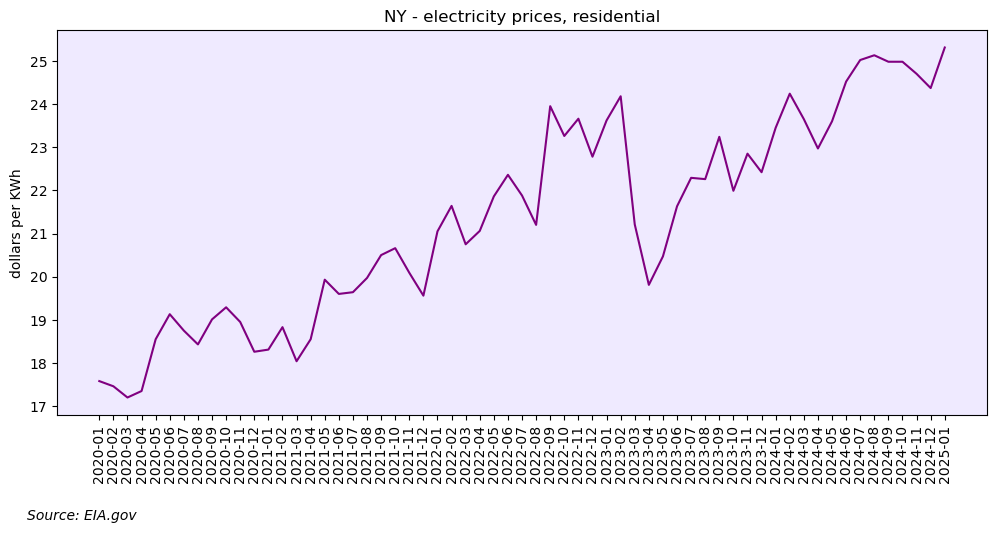

In [23]:
EIA(EIAkey,state="NY")

## Money supply (M2)

DEnition of money supply M1 and M2, [here](https://www.federalreserve.gov/faqs/money_12845.htm).

We are using [FRED](https://fred.stlouisfed.org/) data.

In [24]:
FREDkey=os.environ["FRED_API_key"]

In [27]:
FREDurl_start = 'https://api.stlouisfed.org/fred/category?category_id='
FREDurl_end = '&api_key='+FREDkey+'&file_type=json'

In [46]:
for i in range(1,1000) :
    FREDurl = FREDurl_start+str(i)+FREDurl_end
    r = requests.get(FREDurl).json()
    if 'error_code' not in r:
        print(r['categories'][0]['id'],":  ",r['categories'][0]['name'])

1 :   Production & Business Activity
2 :   Productivity & Costs
3 :   Industrial Production & Capacity Utilization
4 :   Employment Cost Index
5 :   Federal Government Debt
6 :   Retail Trade
9 :   Consumer Price Indexes (CPI and PCE)
10 :   Population, Employment, & Labor Markets
11 :   Current Employment Statistics (Establishment Survey)
12 :   Current Population Survey (Household Survey)
13 :   U.S. Trade & International Transactions
15 :   Exchange Rates
16 :   Exports
17 :   Imports
18 :   National Income & Product Accounts
21 :   Price Indexes & Deflators
22 :   Interest Rates
23 :   Banking
24 :   Monetary Data
25 :   M1 and Components
26 :   Memorandum Items
28 :   M3 and Components
29 :   M2 and Components
30 :   MZM
31 :   Producer Price Indexes (PPI)
46 :   Financial Indicators
51 :   Bankers Acceptance Rate
64 :   8th District Banking Performance
65 :   Arkansas
66 :   Illinois
67 :   Indiana
68 :   Kentucky
69 :   Mississippi
70 :   Missouri
71 :   Tennessee
72 :   8th Dis

In [97]:
category = '29'
FREDurl2= 'https://api.stlouisfed.org/fred/category/series?category_id='+category+'&api_key='+FREDkey+'&file_type=json'

r = requests.get(FREDurl2).json()

In [98]:
type(r)

dict

In [99]:
r.keys()

dict_keys(['realtime_start', 'realtime_end', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'seriess'])

In [108]:
r['seriess'][3]

{'id': 'M2NS',
 'realtime_start': '2025-04-01',
 'realtime_end': '2025-04-01',
 'title': 'M2',
 'observation_start': '1959-01-01',
 'observation_end': '2025-02-01',
 'frequency': 'Monthly',
 'frequency_short': 'M',
 'units': 'Billions of Dollars',
 'units_short': 'Bil. of $',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2025-03-25 12:01:50-05',
 'popularity': 65,
 'group_popularity': 95,
 'notes': 'announcements (https://www.federalreserve.gov/feeds/h6.html) and Technical Q&As (https://www.federalreserve.gov/releases/h6/h6_technical_qa.htm) posted on December 17, 2020.\n\nFor questions on the data, please contact the data source (https://www.federalreserve.gov/apps/ContactUs/feedback.aspx?refurl=/releases/h6/%). For questions on FRED functionality, please contact us here (https://fred.stlouisfed.org/contactus/).</p>'}

In [125]:
FREDurl3 = 'https://api.stlouisfed.org/fred/series/observations?series_id='+r['seriess'][3]['id']+'&observation_start=2020-01-01&api_key='+FREDkey+'&file_type=json'

In [126]:
FREDurl3

'https://api.stlouisfed.org/fred/series/observations?series_id=M2NS&observation_start=2020-01-01&api_key=2562f9cb28ed0c8daca55d803a7b0fd7&file_type=json'

In [127]:
r2 = requests.get(FREDurl3).json()

In [128]:
r2.keys()

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])

In [129]:
M2 = pd.DataFrame(r2['observations'])

In [130]:
M2.sort_values(by='realtime_start', ascending=True, inplace=True)

In [131]:
M2.tail(10)

,realtime_start,realtime_end,date,value
21,2025-04-01,2025-04-01,2021-10-01,21100.3
22,2025-04-01,2025-04-01,2021-11-01,21334.0
23,2025-04-01,2025-04-01,2021-12-01,21657.1
24,2025-04-01,2025-04-01,2022-01-01,21639.9
25,2025-04-01,2025-04-01,2022-02-01,21591.5
26,2025-04-01,2025-04-01,2022-03-01,21863.2
27,2025-04-01,2025-04-01,2022-04-01,21853.0
28,2025-04-01,2025-04-01,2022-05-01,21556.2
15,2025-04-01,2025-04-01,2021-04-01,20252.1
61,2025-04-01,2025-04-01,2025-02-01,21616.3


In [133]:
M2.shape

(62, 4)

In [135]:
M2['change'] = M2['value'].astype(float).pct_change(periods=12) * 100

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(M2['date'],M2['change'])
plt.title('Cange in money suply - M2')
plt.xticks(ticks=range(11, len(M2['date']), 3),
                   labels=M2['date'].iloc[11::3],
                   rotation=45);
plt.show()

NameError: name 'plt' is not defined